In [2]:
from numpy import *
import numpy as np, matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from qutip import *

In [3]:
e = basis(2,0) # |D-1/2>=|0>
g = basis(2,1) # |S-1/2>=|1>

In [4]:
g_g = g*g.dag() # |g><g| g_g = fock_dm(2,0)
e_e = e*e.dag() # |e><e| e_e = fock_dm(2,1)

In [5]:
σp = e*g.dag() # |e><g| = |0><1|
σm = g*e.dag() # |g><e| = |1><0|

In [13]:
σz = e_e - g_g
σx = σp + σm
σy = -1.0j*(σp - σm)

In [28]:
N = 10 #fockstate_dim

In [61]:
a = tensor(destroy(N), qeye(2))
a_dag = a.dag()
sm = tensor(qeye(N),σm)

In [57]:
η = 0.1
Ω = 1
ħ = 1

In [71]:
identity_sb = qeye(2)
identity_vb = qeye(N)
initial_state = tensor(basis(N,0), g)

In [72]:
H = 0.5*1.0j*ħ*Ω*η*(a.dag()*sm.dag()-a*sm) #tensor([σp,a.dag()])+tensor([σm,a])
times = np.linspace(0.0,1,1000)

In [73]:
c_ops = []
exc_ops = [tensor([e*e.dag(),identity_vb])]#basis(fockstate_dim,0)*basis(fockstate_dim,0).dag()])]
t = times
output = mesolve(H,initial_V,t,c_ops,exc_ops)

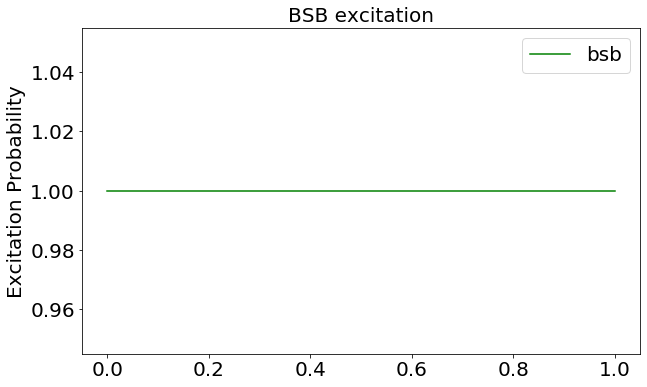

In [74]:
plt.figure(num=2, figsize=(10,6))
plt.plot(t,output.expect[0],'g',label=r'bsb')
plt.title('BSB excitation',fontsize=20)
#plt.xlabel('Time [ms]',fontsize=20)
plt.ylabel('Excitation Probability',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc= 'upper right',fontsize=20)
plt.show()

In [46]:
basis(N,0)

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [34]:
print(a_dag)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.         0.         0.        ]
 [0.         0.         0.         0.    

In [3]:
sigmam()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]